<a href="https://colab.research.google.com/github/zhanyao17/ODL/blob/main/CNN_MNIST_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# This is the number of filter
'''
Convolutional neural networks do not learn a single filter; they, 
    in fact, learn multiple features in parallel for a given input.
'''
L1 = 16
L2 = 32
L3 = 64

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(28,28,1),padding='same')) # follow the input size
model.add(MaxPooling2D((2,2))) # used to down sampling (2*2 it will divide the size by 2 every time pasess thru)
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7574 - loss: 0.7608 - val_accuracy: 0.9737 - val_loss: 0.0795
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 71s 56ms/step - accuracy: 0.9510 - loss: 0.1636 - val_accuracy: 0.9809 - val_loss: 0.0568
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9636 - loss: 0.1177 - val_accuracy: 0.9869 - val_loss: 0.0413
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9731 - loss: 0.0906 - val_accuracy: 0.9877 - val_loss: 0.0370
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9758 - loss: 0.0809 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9778 - loss: 0.0744 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9810 - loss: 0.0631 - val_accuracy: 0.9888 - val_loss: 0.0333
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.9822 - loss: 0.0601 - 

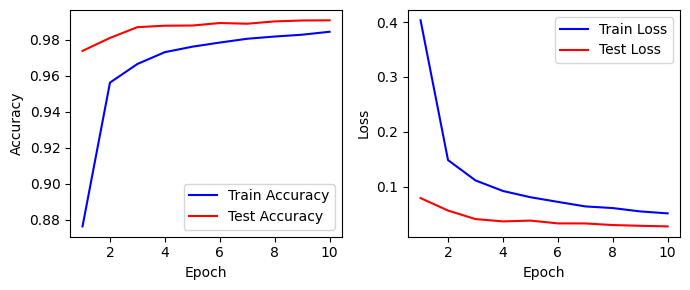

In [ ]:
# Visualization on the result
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

# Grid Search Hyperparameters

In [ ]:
# !pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model(L1,L2,L3):
  model = Sequential()
  model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(L3,activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(10,activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

# Tune the Batch Size and Epochs

In [ ]:
model = KerasClassifier(model=create_model(L1,L2,L3),verbose=0)

batch_size = [100,128]
epochs = [20]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# Summarise result
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params'] # params information
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

# Tune the model

In [ ]:
# create model
model = KerasClassifier(model=create_model(L1,L2,L3),epochs=20,batch_size=100)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params'] # params information
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

## Modify neuron

In [ ]:
def create_model(neurons):
  model = Sequential()
  model.add(Conv2D(neurons,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(rate=0.5)
  model.add(Dense(10,activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model